In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = {}
data['150'] = np.loadtxt("../data/150.vae", delimiter=',',
                        dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
data['300'] = np.loadtxt("../data/300.vae", delimiter=',',
                        dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])

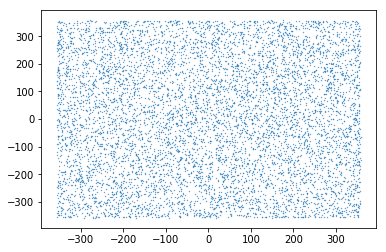

In [15]:
plt.scatter(data['300']['x'], data['300']['y'], s=0.1)

[]

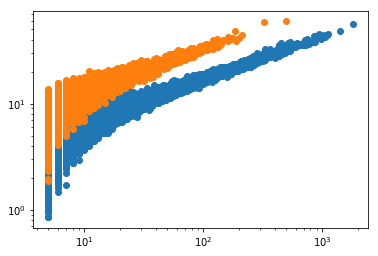

In [19]:
plt.scatter(data['150']['N'], data['150']['R'])
plt.scatter(data['300']['N'], data['300']['R'])
plt.loglog()

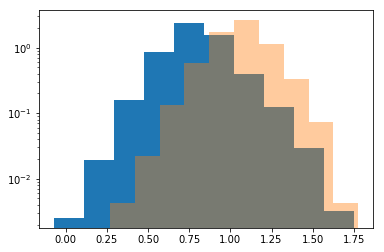

In [26]:
_ = plt.hist(np.log10(data['150']['R']), density=True, log=True)
_ = plt.hist(np.log10(data['300']['R']), density=True, log=True, alpha=0.4)

/Users/forero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


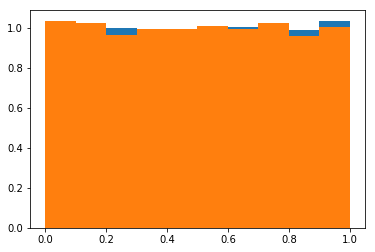

In [36]:
r = np.sqrt(data['150']['x']**2 + data['150']['y']**2 + data['150']['z']**2)
_ = plt.hist(np.abs(data['150']['a_y']), normed='true')
_ = plt.hist(np.abs(data['300']['a_z']), normed='true')

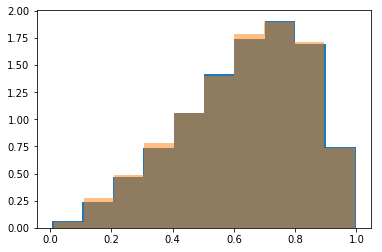

In [42]:
T_150 = (data['150']['a']**2 - data['150']['b']**2)/(data['150']['a']**2 - data['150']['c']**2)
T_300 = (data['300']['a']**2 - data['300']['b']**2)/(data['300']['a']**2 - data['300']['c']**2)
_ = plt.hist(T_150, density=True)
_ = plt.hist(T_300, alpha=0.5, density=True)

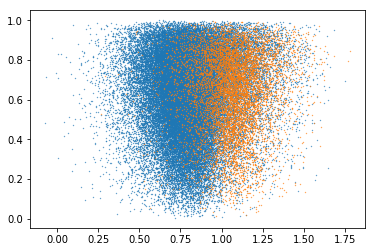

In [47]:
plt.scatter(np.log10(data['150']['R']), T_150, s=0.1)
plt.scatter(np.log10(data['300']['R']), T_300, s=0.1)

In [50]:
import halotools.mock_observables

In [81]:
pos_150 = np.array([data['150']['x'], data['150']['y'], data['150']['x']]).T
r  = np.logspace(-1, 2, 20)
corr_150 = halotools.mock_observables.tpcf(pos_150, r, period=720)


pos_300 = np.array([data['300']['x'], data['300']['y'], data['300']['x']]).T
r  = np.logspace(-1, 2, 20)
corr_300 = halotools.mock_observables.tpcf(pos_300, r, period=720)

[]

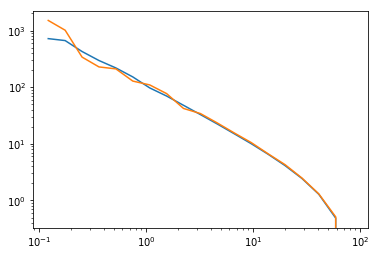

In [82]:
#plt.scatter(r, corr_150)
plt.plot(0.5*(r[1:]+r[:-1]), corr_150)
plt.plot(0.5*(r[1:]+r[:-1]), corr_300)
plt.loglog()